In [1]:
## Create Latitude and Longitude Combos


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import o_weather
import requests

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
#when importing from a file thats py already don't need as py
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + o_weather

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# WARNING zipped tuple cann only be unziiped once before remvoed from computer's memory

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters./ want the 1st iteration of the logging for each recorded response
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
#### Generate Random World Cities

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [12]:
##Loop through Cities and Build City URL

In [13]:
#for i, item in enumerate(list):
#syntax for method

In [14]:
#used enumerate to loop while keeping track of the index vaules in a seprate var

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tumannyy
Processing Record 3 of Set 1 | ossora
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | sigmaringen
Processing Record 9 of Set 1 | lowestoft
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | surt
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | sechura
Processing Record 15 of Set 1 | salinopolis
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | kungurtug
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | imbituba
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of Set 1 | ushuaia
Processing Record 25 of Set 1 | av

In [16]:
## Handling API Request Errors

In [17]:
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
        # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [18]:
len(city_data)# the isnructions have me confused on where my code is suppose togo!!

1

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arroyo,41.6096,-4.7969,46.44,93,0,6.91,ES,2021-09-21 01:37:54


In [20]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed" ]


In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arroyo,0,ES,2021-09-21 01:37:54,93,41.6096,-4.7969,46.44,6.91


In [22]:
# For Below
#The last line in the code block will export the DataFrame to a CSV file, 
#with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame,
#that header will be present in the DataFrame.

In [23]:
# Create the output file (CSV).// unhash when iteration is correct!
#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
#can add files to gitignore interesting

In [25]:
## Plotting Lat VS TEMP

In [26]:
# Extract relevant fields from the DataFrame for plotting./// retieving the data is the first step
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

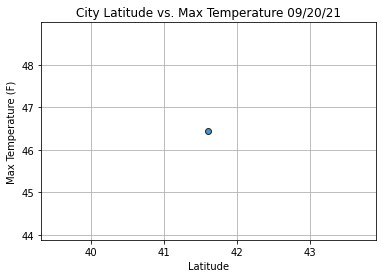

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

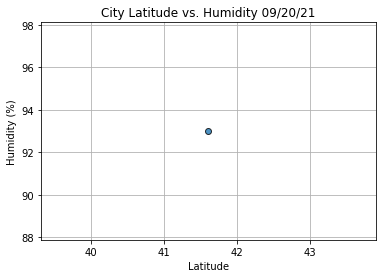

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

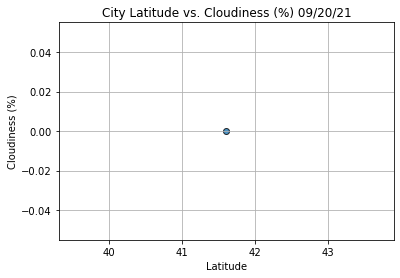

In [29]:
# Build the scatter plots for latitude vs. cloudiness. 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

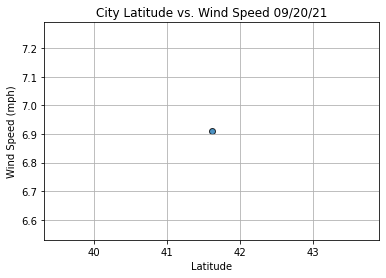

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()